In [222]:
import cv2.cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

import poseidon

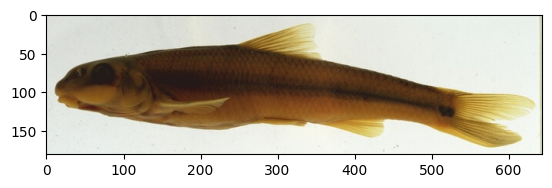

In [223]:
fish = poseidon.INHSFish.with_id("45896")
im = fish.get_cv_img()
plt.imshow(im)

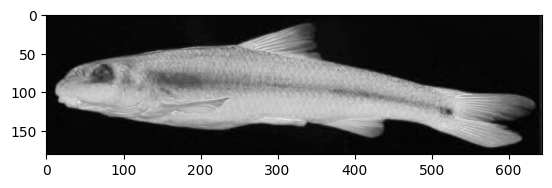

In [224]:
hsvim = cv.cvtColor(im, cv.COLOR_RGB2HSV)
satim = hsvim[:,:,1]
plt.imshow(satim, cmap="gray")

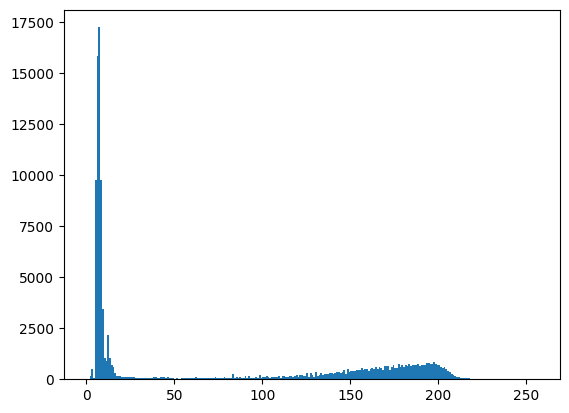

In [225]:
plt.hist(satim.ravel(),256,[0,256])
plt.show()

89.0


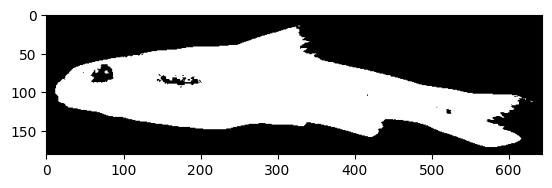

In [226]:
otsu_thresh, threshim = cv.threshold(satim, 0, 0xff, cv.THRESH_BINARY | cv.THRESH_OTSU)
plt.imshow(threshim, cmap="gray")
print(otsu_thresh)

In [227]:
dark_px = satim[satim < otsu_thresh].flatten()
dark_mean = np.mean(dark_px)
dark_std = np.std(dark_px)

print(dark_mean, dark_std)

new_thresh = dark_mean + 2 * dark_std

10.849159269683193 13.824450439056958


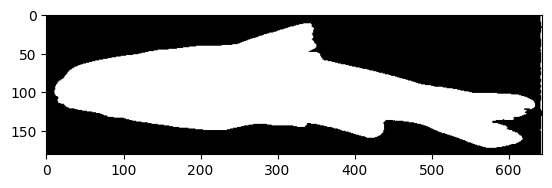

In [228]:
_, new_threshim = cv.threshold(satim, new_thresh, 0xff, cv.THRESH_BINARY)
plt.imshow(new_threshim, cmap="gray")

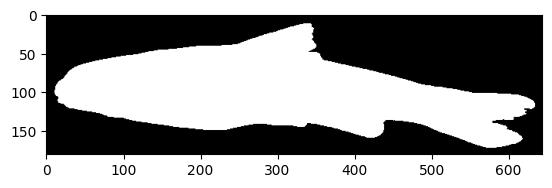

In [229]:
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(new_threshim, connectivity=8, ltype=cv.CV_32S)
label_areas = [(i, stats[i, cv.CC_STAT_AREA]) for i in range(num_labels)]
label_areas.sort(key=lambda p: -p[1])
new_threshim[(labels != label_areas[0][0]) & (labels != label_areas[1][0])] = 0
plt.imshow(new_threshim, cmap="gray")

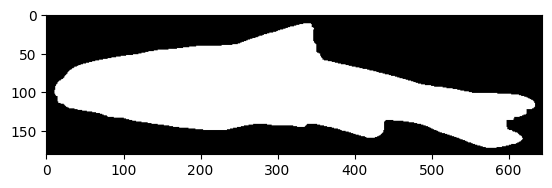

In [230]:
kernel = np.ones((5,5), np.uint8)
new_threshim = cv.morphologyEx(new_threshim, cv.MORPH_CLOSE, kernel, iterations=2)
plt.imshow(new_threshim, cmap="gray")

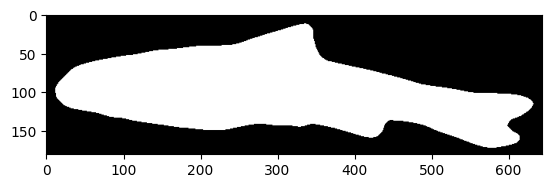

In [231]:
new_threshim = cv.medianBlur(new_threshim, 15, dst=new_threshim)
plt.imshow(new_threshim, cmap="gray")

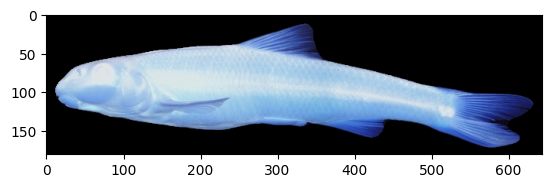

In [232]:
mask = np.repeat(new_threshim[:, :, np.newaxis], 3, axis=2)
overlay = im * mask
plt.imshow(overlay)

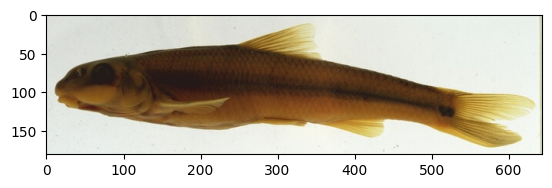

In [233]:
plt.imshow(im) # Compare against our exiting outlines, and do an outline overlay of this one

'\nTWO BIG NEXT TODOS: (IN ADDITION TO WHATEVER IS ON THE BRAINSTORM TEXT FILE)\nAFTER BINARIZATION, REMOVE CONNECTED COMPONENTS BELOW SIZE THRESHOLD (LIKE CARD NOISE IN CURRENT IMAGE 45896)\nTHEN, WE CAN ALSO CONSIDER MAKING AN IMAGE INADMISSIBLE IF THE OUTLINE TOUCHES A BORDER.\n'

In [ ]:

"""
TWO BIG NEXT TODOS: (IN ADDITION TO WHATEVER IS ON THE BRAINSTORM TEXT FILE)
AFTER BINARIZATION, REMOVE CONNECTED COMPONENTS BELOW SIZE THRESHOLD (LIKE CARD NOISE IN CURRENT IMAGE 45896)
THEN, WE CAN ALSO CONSIDER MAKING AN IMAGE INADMISSIBLE IF THE OUTLINE TOUCHES A BORDER.
"""